## **Tanzanian Water Wells Prediction**

Final Project Submission

Student name: Josephine Maro

Student pace: full time

Scheduled project review date/time: June 7th

Instructor name: Maryann Mwikali

## Overview


Water well functionality is critical for the provision of safe and reliable water in Tanzania, particularly in rural areas. However, many wells experience functionality issues that can lead to water shortages and impact community health and well-being. This project aims to analyze data from Tanzanian water wells to identify patterns and factors that contribute to well functionality status. By developing predictive models and segmenting wells based on their characteristics and performance, we aim to provide actionable insights to improve well maintenance, optimize resource allocation, and enhance water access. These insights will support decision-making processes to ensure the sustainability and efficiency of water supply systems.

## Business Understanding 

This prediction helps in identifying which wells need maintenance or repair, thereby ensuring sustainable access to clean water for communities. The primary stakeholders include government agencies, non-governmental organizations (NGOs), and community leaders responsible for water supply management. Secondary stakeholders include local maintenance teams and international donors interested in supporting water projects. Key study factors include:

Geographic Location: Understanding the geographic distribution of functional and non-functional wells help identify regions with higher risks of well failures. 

Well Characteristics: Analyzing characteristics such as well depth, construction type, and water source reveal insights into how these factors correlate with functionality. Wells with certain features may require more frequent maintenance or specific interventions to remain operational.

Usage Patterns: Examining usage patterns, including the volume of water extracted and the frequency of use, provide insights into the wear and tear on wells. High-usage wells require more robust maintenance schedules.

Maintenance Records: Reviewing maintenance history, including the frequency and types of repairs conducted, help identify common issues that lead to well failures. 

## Data Understanding

To build an accurate predictive model, we first need to understand the data we're working with. This includes loading the necessary libraries, importing the data, combining datasets, and performing initial exploratory analysis.

## Importing Libraries

In [ ]:
# Loading the imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, classification_report, confusion_matrix, classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline

%matplotlib inline

c:\Users\HP\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Datasets

In [ ]:
# Loading the data
df_1 = pd.read_csv('training_set_values.csv')
df_2 = pd.read_csv('training_set_labels.csv')

In [ ]:
# Combining the two datasets together 

def combined_dataframe(data_0, data_1):

    """ A simple function to combine the two datasets using the id column present in both datasets """

    new_df = data_0.set_index('id').join(data_1.set_index('id'))

    return new_df

df = combined_dataframe(df_1, df_2)
df.head() 

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
# Check for the columns
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [ ]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [ ]:
# Check the statistical analysis of the data
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [ ]:
# Check the data types of the data
print('Numerical Columns:', df.select_dtypes(include='number').columns)
print('Categorical Coulumns:', df.select_dtypes(include='object').columns)

Numerical Columns: Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')
Categorical Coulumns: Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


## Data Cleaning

In [ ]:
#Check for duplicates
duplicates = []

def check_duplicates(df):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in df.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(df)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Duplicated rows constitute of 0.06 % of our dataset


In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

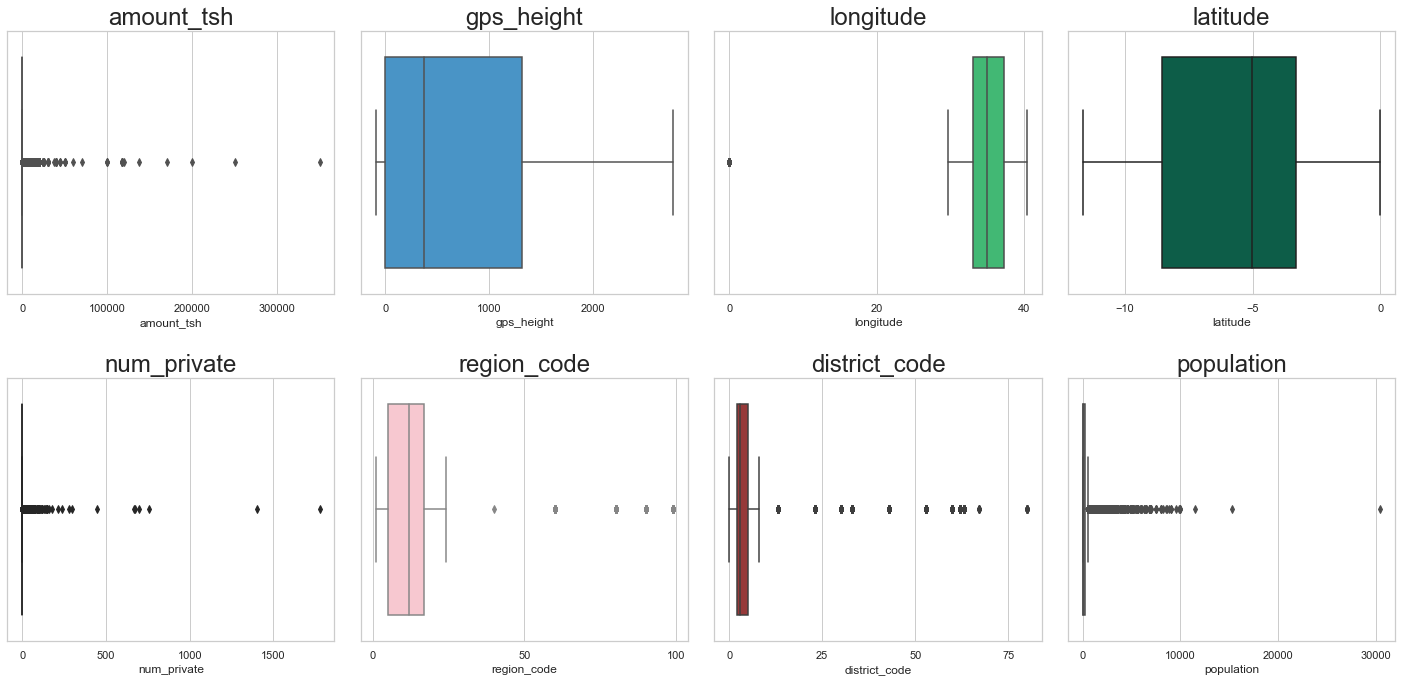

In [ ]:
# Visualizing outliers in our numerical data
 
def plot_boxplots(df, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i, col in enumerate(cols[:8]):

        # convert the x-axis variable to a numeric data type
        
        df[col] = df[col].astype(float)
        sns.boxplot(x=df[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = df.select_dtypes(include='number').columns


plot_boxplots(df, cols)

In [ ]:
# Check for missing values
def missing_values(df):

    missing_values = df.isnull().sum().sort_values(ascending=False)

    missing_val_percent = ((df.isnull().sum()/len(df)).sort_values(ascending=False))

    """ creating a dataframe containing missing values and their percentages """
    
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent*100})
    
    return missing_df[missing_df['Percentage %'] > 0]

missing_values(df)

,Missing Values,Percentage %
scheme_name,28139,47.400782
scheme_management,3877,6.530894
installer,3655,6.156930
funder,3635,6.123240
public_meeting,3314,5.582508
permit,3056,5.147901
subvillage,371,0.624958


Scheme name contains about 47 percentage of missing values , which is almost half our dataset. Its only correct we drop the column. We'll also drop the Scheme Management column as it is irrelevant in our analysis.

In [ ]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210.0,CES,37.169807,-3.253847,Area Three Namba 27,0.0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0.0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
37057,0.0,2011-04-11,NaN,0.0,NaN,34.017087,-8.750434,Mashine,0.0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [ ]:
# Tally each of the columns
def tally(column):

    groupings = column.value_counts()

    return groupings

In [ ]:
# Dropping the unnecessary columns
columns_to_drop = ['scheme_name', 'scheme_management']

df.drop(columns_to_drop, inplace=True, axis=1)
df.head(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.0,Roman,34.938093,-9.856322,none,0.0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0.0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0.0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0.0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0.0,Artisan,31.130847,-1.825359,Shuleni,0.0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
# Dropping rows with missing values from column installer, funder and public_meeting

def drop_rows(df, columns):

    new_data = df.dropna(subset=columns, inplace=True)

    return new_data

col = ['installer', 'funder', 'public_meeting']

drop_rows(df, col)

In [ ]:
# Confirming if there are any missing values
missing_values(df)

,Missing Values,Percentage %
permit,519,0.987443
subvillage,370,0.703957


In [ ]:
# Now, we'll drop the columns that are irrelevant to our business objective
irrelevant_columns = df[['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded']]
df.drop(columns=irrelevant_columns, inplace=True, axis=0)
df.head(5)

,amount_tsh,funder,gps_height,installer,longitude,latitude,num_private,basin,region,population,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,0.0,Lake Nyasa,Iringa,109.0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,0.0,Pangani,Manyara,250.0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,0.0,Ruvuma / Southern Coast,Mtwara,58.0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,Action In A,0.0,Artisan,31.130847,-1.825359,0.0,Lake Victoria,Kagera,0.0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20.0,Mkinga Distric Coun,0.0,DWE,39.172796,-4.765587,0.0,Pangani,Tanga,1.0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [ ]:
df.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'num_private', 'basin', 'region', 'population',
       'public_meeting', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

There are some columns that have the same type of information, to avoid redundancy, let's drop them.

In [ ]:
repeated_columns = df[['payment', 'quality_group', 'quantity_group', 'source', 'source_class', 'waterpoint_type', 'management_group', 
                       'extraction_type', 'extraction_type_class', 'num_private', 
                       ]]

df.drop(repeated_columns, inplace=True, axis=1)
df.head(5)

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,construction_year,extraction_type_group,management,payment_type,water_quality,quantity,source_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109.0,True,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Pangani,Manyara,250.0,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58.0,True,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe,non functional
19728,0.0,Action In A,0.0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0.0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
9944,20.0,Mkinga Distric Coun,0.0,DWE,39.172796,-4.765587,Pangani,Tanga,1.0,True,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe,functional


In [ ]:
# Installing the funder column
column_values = df['funder']

# Create an empty dictionary to store counts
value_counts = {}

# Count the occurrences of each unique value
for value in column_values:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Print the counts for all unique values
print("Value counts for all unique values:")
for value, count in value_counts.items():
    print(f"{value}: {count}")


Value counts for all unique values:
Roman: 274
Lottery Club: 8
Unicef: 1031
Action In A: 1
Mkinga Distric Coun: 150
Dwsp: 547
Rwssp: 1256
Wateraid: 333
Isingiro Ho: 14
Private: 273
Danida: 2924
World Vision: 1167
Lawatefuka Water Supply: 180
Biore: 31
Rudep: 311
Twe: 97
Isf: 312
African Development Bank: 35
Government Of Tanzania: 8654
Sobodo: 1
Hesawa: 1980
Water: 583
Private Individual: 792
Undp: 67
Not Known: 26
Kirde: 54
Cefa: 67
Ces(gmbh): 258
European Union: 48
Lga: 430
District Council: 817
Muwsa: 107
Dwe/norad: 50
Kkkt_makwale: 166
Sawaka: 2
Ces (gmbh): 163
Olgilai Village Community: 14
Roman Catholic: 121
Norad: 759
Adra: 261
Sema: 50
Piusi: 1
Dwe: 479
Rc Church: 319
Swisland/ Mount Meru Flowers: 21
Swedish: 131
Idc: 92
He: 124
Isf/tacare: 14
Jica: 248
Mzee Sh: 1
Aict: 85
Tcrs: 593
Kiuma: 30
Germany Republi: 610
Netherlands: 459
Ruthe: 16
Tulawaka Gold Mine: 5
Kkkt: 1282
Nethalan: 152
Tasaf: 820
Concern World Wide: 145
Wfp: 50
Lips: 27
Sida: 25
World Bank: 1268
Tanza: 88
Sw: 3

In [ ]:
# Inspecting the installer column
column_values = df['installer']

# Create an empty dictionary to store counts
value_counts = {}

# Count the occurrences of each unique value
for value in column_values:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Print the counts for all unique values
print("Value counts for all unique values:")
for value, count in value_counts.items():
    print(f"{value}: {count}")


Value counts for all unique values:
Roman: 93
World vision: 368
UNICEF: 201
Artisan: 122
DWE: 16669
DWSP: 192
Water Aid: 48
Private: 123
DANIDA: 863
Lawatefuka water sup: 180
WEDECO: 396
Danid: 72
TWE: 111
ISF: 133
Kilolo Star: 2
District council: 388
Water: 71
WU: 301
Not known: 17
Central government: 616
CEFA: 75
Commu: 1059
Accra: 30
World Vision: 245
LGA: 401
MUWSA: 107
KKKT _ Konde and DWE: 166
Government: 1469
Olgilai village community: 14
RWE: 1189
Adra /Community: 55
SEMA: 249
SHIPO: 147
ACRA: 278
Community: 547
Sengerema Water Department: 214
HE: 124
ISF and TACARE: 1
Kokeni: 30
DA: 84
Adra: 78
ALLYS: 1
AICT: 84
KIUMA: 30
CES: 610
District Counci: 13
HESAWA: 370
Ruthe: 16
Adra/Community: 60
Tulawaka Gold Mine: 5
KKT C: 5
Hesawa: 792
Water board: 81
LOCAL CONTRACT: 31
WFP: 15
KKKT: 893
LIPS: 2
TASAF: 355
World: 121
SW: 3
Shipo: 86
Fini water: 131
Kanisa: 6
0: 344
OXFARM: 95
VILLAGE COUNCIL Orpha: 7
Villagers: 198
Idara ya maji: 222
FPCT: 14
WVT: 155
Ir: 108
DANID: 552
Angli: 91

## Exploratory Data Analysis

We seek to understand the distribution of various features, identify patterns, and gain insights that are useful for predicting the functionality status of the water wells.

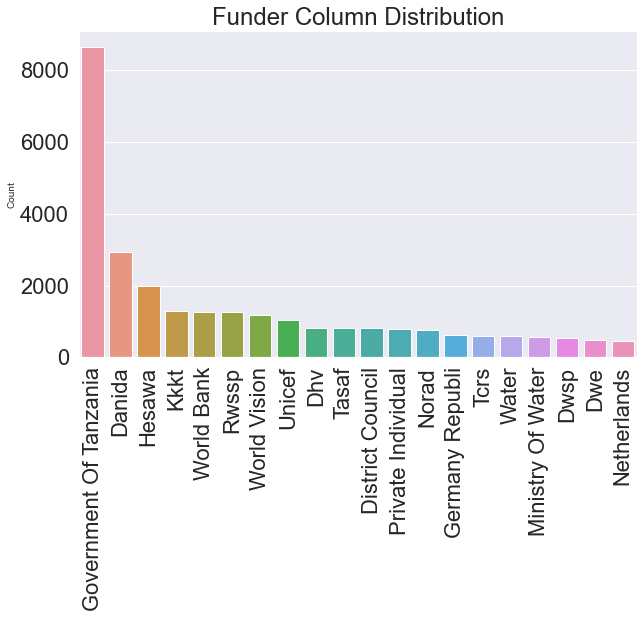

In [ ]:
# function to plot distribution of each column.
 
def plot_data(df, col, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    column_groupings = tally(df[col])
    sns.barplot(x=column_groupings.head(20).index, y=column_groupings.head(20))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)

    
plot_data(df, 'funder', 'Funder Column Distribution')

The countplot visualizes the distribution showing the number of water points funded by different organizations or individuals. 

### Water Point distribution

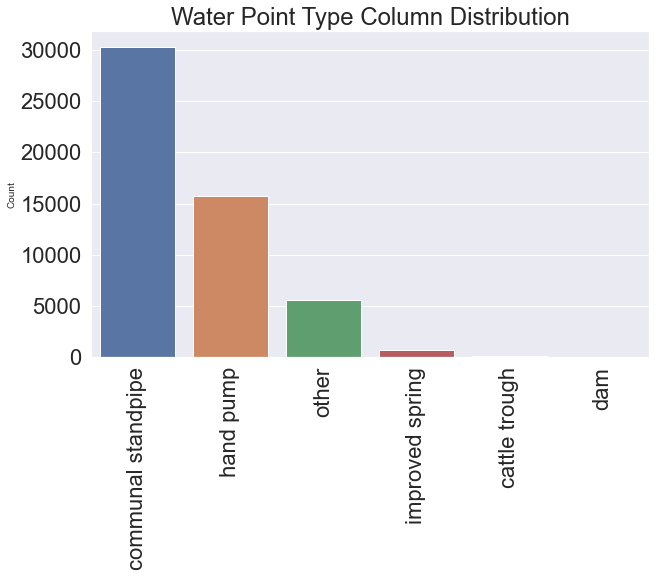

In [ ]:
plot_data(df, 'waterpoint_type_group', 'Water Point Type Column Distribution')

The countplot visualizes the distribution of different types of water points to understand the most common types of water points in the dataset.

### Water Source Distribution

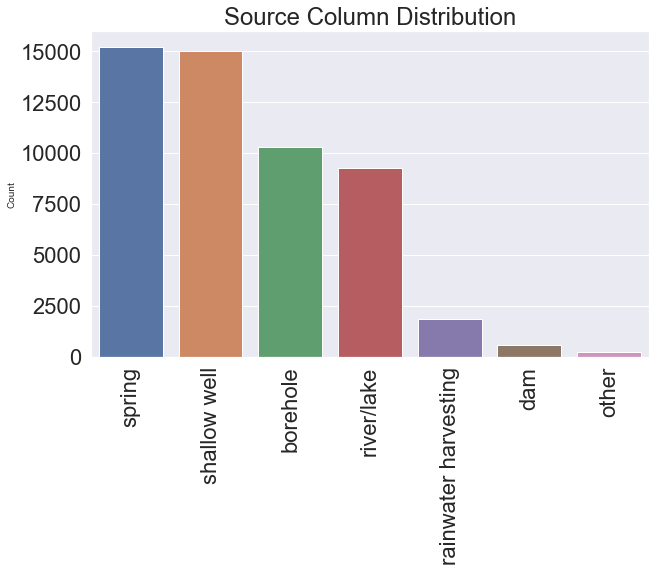

In [ ]:
plot_data(df, 'source_type', 'Source Column Distribution')

The countplot visualizes the distribution of water sources, showing the various sources of water accessed by the water points.

### Management Distribution

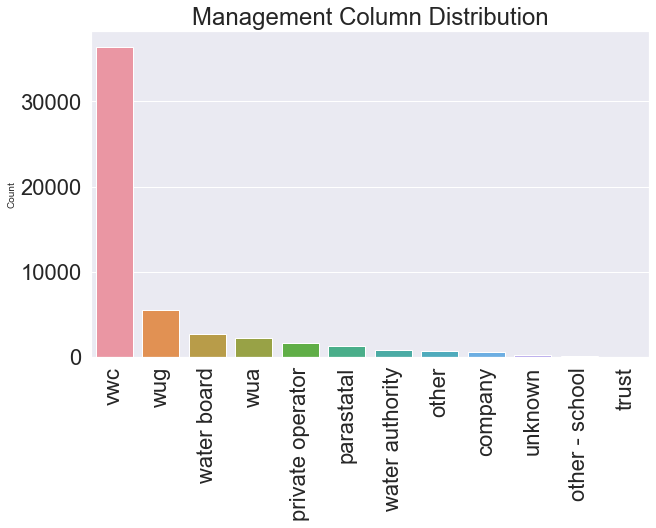

In [ ]:
plot_data(df, 'management', 'Management Column Distribution')

The countplot visualizes the distribution of different management types responsible for the water points. This helps to understand the most common management types in the dataset.

### Extraction by type distribution

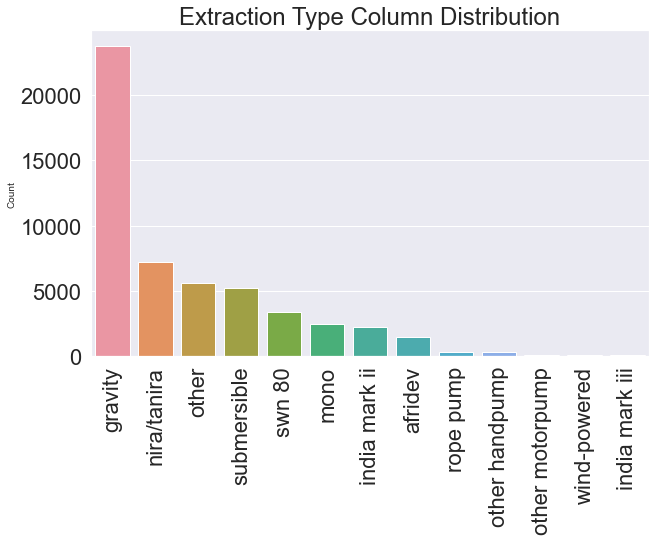

In [ ]:
plot_data(df, 'extraction_type_group', 'Extraction Type Column Distribution')

The countplot visualizes the distribution of different extraction types used to access water. 

### Payment Distribution

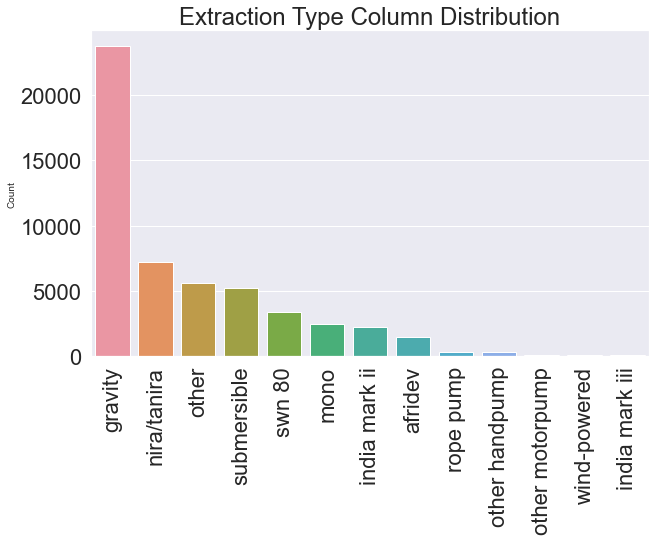

In [ ]:
plot_data(df, 'extraction_type_group', 'Extraction Type Column Distribution')

The countplot visualizes the distribution of different payment types for water access to understand the most common payment methods in the dataset.

### Water Quality Distribution

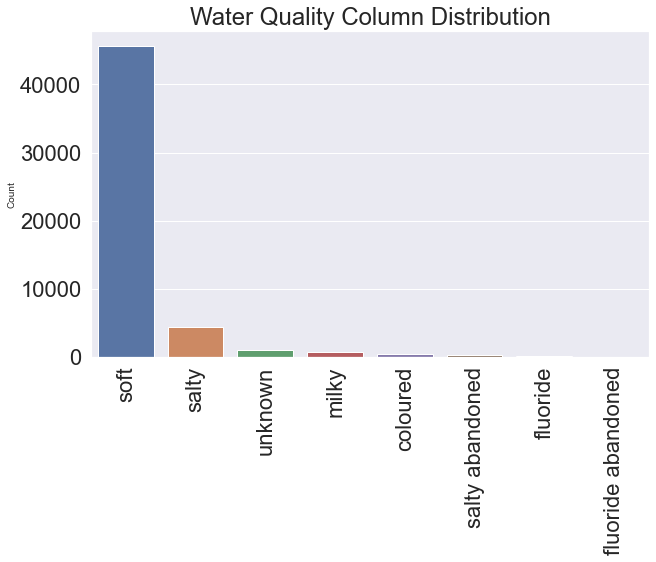

In [ ]:
plot_data(df, 'water_quality', 'Water Quality Column Distribution')

### Quality Distribution

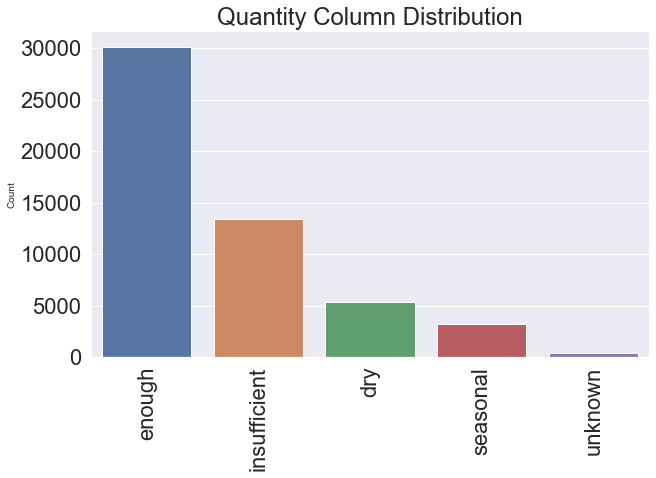

In [ ]:
plot_data(df, 'quantity', 'Quantity Column Distribution')

### Population Distribution

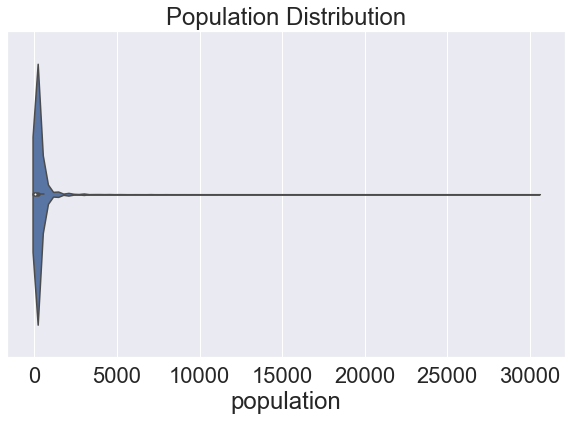

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['population'])
plt.title('Population Distribution')
plt.show()

### Amount Total Static Head Distribution

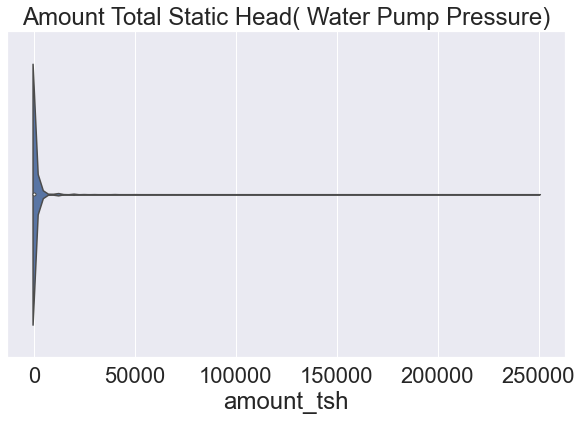

In [ ]:
# plot a violin plot 

plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['amount_tsh'])
plt.title('Amount Total Static Head( Water Pump Pressure)')
plt.show()

### Altitude of the Well(gps_height) Distribution

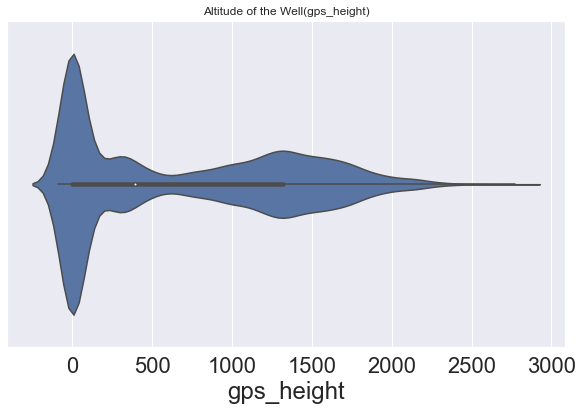

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['gps_height'])
sns.set_theme(style="whitegrid")   
plt.title('Altitude of the Well(gps_height)')
plt.show()

### Analyzing Relationships Between Features

Analyzing relationships between features in the dataset is crucial for uncovering patterns, correlations, and interactions that informed the predictive models. Through these relationships, we identify key factors affecting functionality, detect regional and management-related trends, and enhance feature engineering for improved model performance. Additionally, understanding these relationships aids in identifying potential confounders and improving model interpretability. The relationships provide insights for targeted interventions and sustainable water management practices.

### Basin Vs Quality

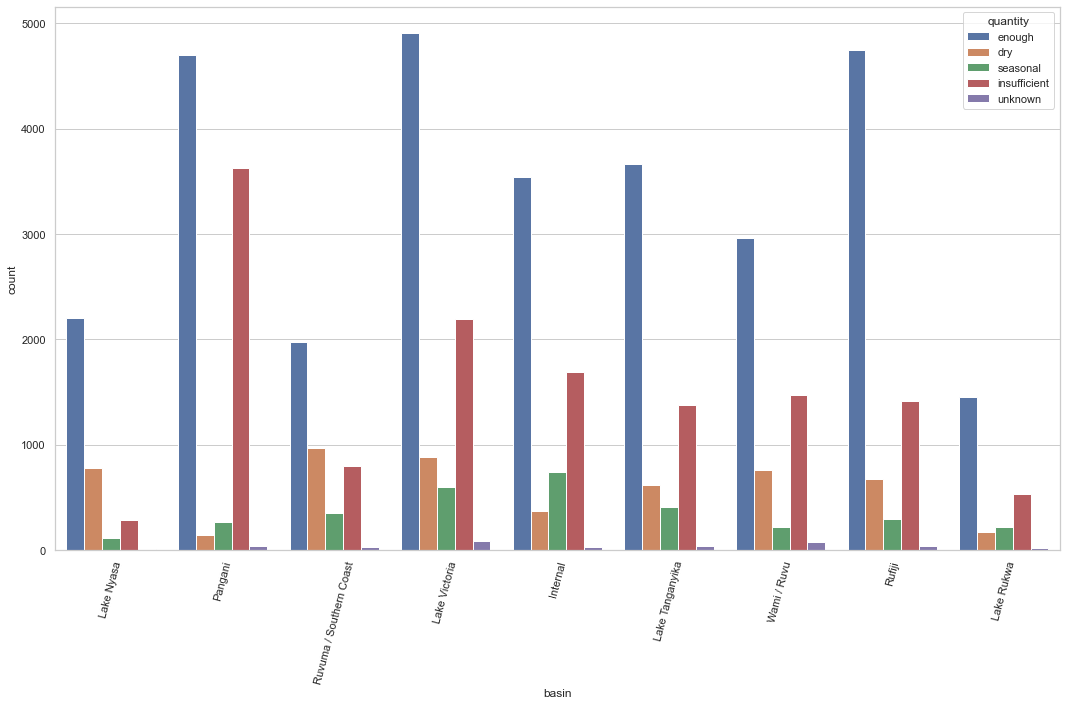

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="quantity", data=df)
plt.xticks(rotation=75);

### Quality Vs Functionality

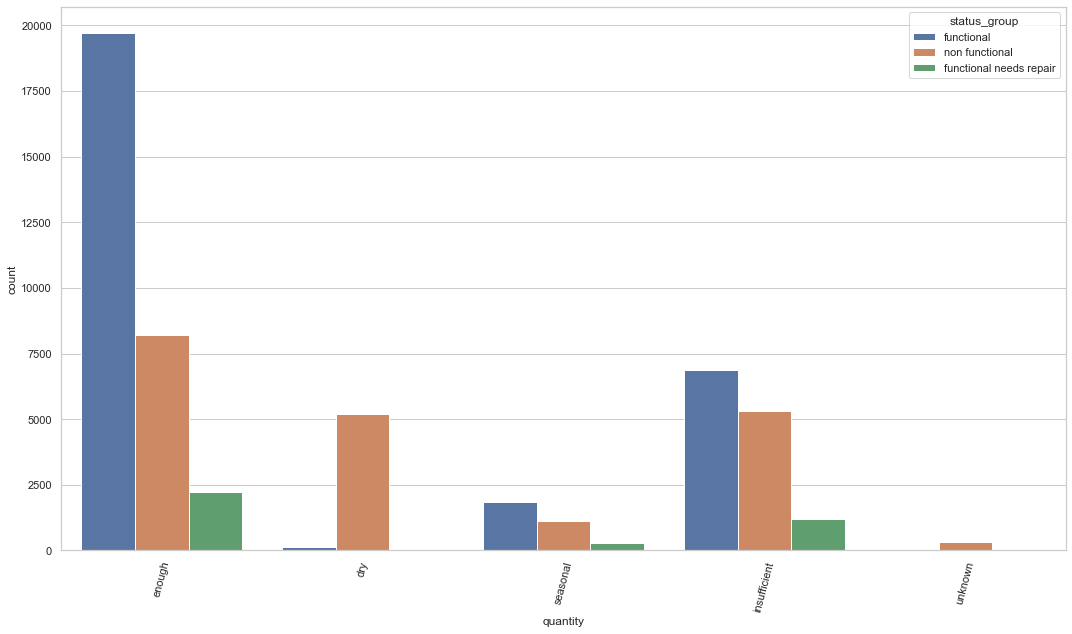

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='quantity', hue="status_group", data=df)
plt.xticks(rotation=75);

### Water Vs Status Group

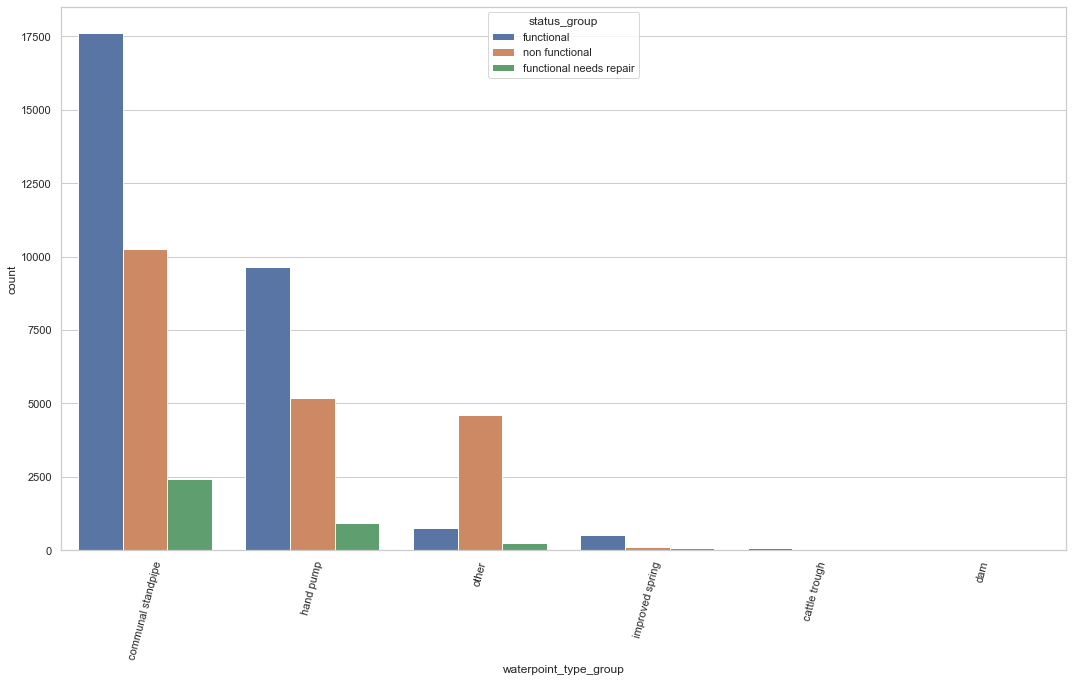

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='waterpoint_type_group', hue="status_group", data=df)
plt.xticks(rotation=75);

### Payment Vs Functionality

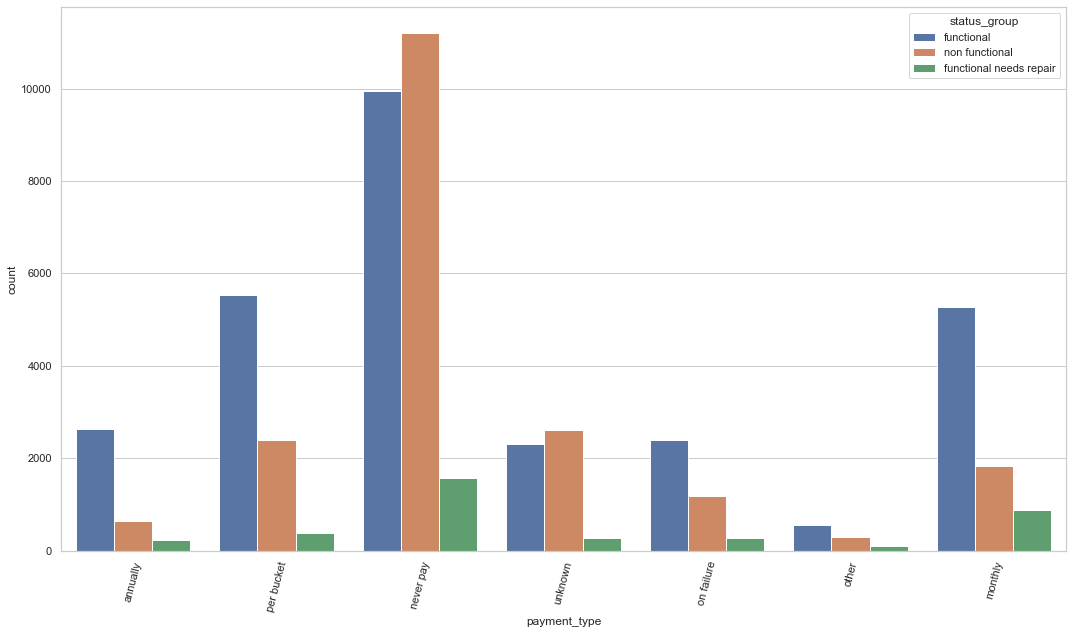

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=df)
plt.xticks(rotation=75);

## Modelling

In [135]:
# Creating a copy of our dataframe
df1 = df.copy()
df1

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,population,public_meeting,construction_year,extraction_type_group,management,payment_type,water_quality,quantity,source_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,109.0,True,1999,gravity,vwc,annually,soft,enough,spring,communal standpipe,functional
34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Pangani,Manyara,250.0,True,2009,gravity,vwc,per bucket,soft,enough,dam,communal standpipe,functional
67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,58.0,True,1986,submersible,vwc,never pay,soft,dry,borehole,communal standpipe,non functional
19728,0.0,Action In A,0.0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,0.0,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
9944,20.0,Mkinga Distric Coun,0.0,DWE,39.172796,-4.765587,Pangani,Tanga,1.0,True,2009,submersible,vwc,per bucket,salty,enough,other,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,500.0,World Bank,351.0,ML appro,37.634053,-6.124830,Wami / Ruvu,Morogoro,89.0,True,2007,submersible,vwc,monthly,soft,enough,borehole,communal standpipe,non functional
60739,10.0,Germany Republi,1210.0,CES,37.169807,-3.253847,Pangani,Kilimanjaro,125.0,True,1999,gravity,water board,per bucket,soft,enough,spring,communal standpipe,functional
27263,4700.0,Cefa-njombe,1212.0,Cefa,35.249991,-9.070629,Rufiji,Iringa,56.0,True,1996,gravity,vwc,annually,soft,enough,river/lake,communal standpipe,functional


In [ ]:
# Converting string to numerical values 
new_status_group = {'non functional':0, 'functional': 1, 'functional needs repair': 2, } 

In [ ]:
# Replacing the status group with the new status group. 
df1['status_group'] = df1['status_group'].replace(new_status_group)

### One Hot Encoding

In [136]:
categorical = ['basin', 'public_meeting', 'management', 'water_quality', 'quantity', 'source_type']
ohe = pd.get_dummies(df[categorical], prefix = categorical, drop_first=True )
ohe.head()

,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,public_meeting_True,management_other,...,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_type_dam,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring
id,,,,,,,,,,,,,,,,,,,,,
69572,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
34310,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
67743,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19728,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
9944,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# Joining the one hot encoded data to the original dataset
new_df = pd.concat([ohe, df1['amount_tsh']], axis = 1)

In [ ]:
# Defining x and y
X = new_df
y = df1['status_group']

In [ ]:
# Performing train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
# Define the pipeline
pipe_logistic = Pipeline([
    ('ss', StandardScaler()),  # StandardScaler for feature scaling
    ('logistic', LogisticRegression())  # Logistic Regression Classifier
])

# Now you can use this pipeline for fitting your data
pipe_logistic.fit(X_train, y_train)

# Predictions
y_pred_logistic = pipe_logistic.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

Accuracy: 0.6643835616438356
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      4029
           1       0.65      0.89      0.75      5733
           2       0.50      0.01      0.01       750

    accuracy                           0.66     10512
   macro avg       0.62      0.45      0.44     10512
weighted avg       0.66      0.66      0.63     10512



The logistic regression model produced an accuracy of approximately 66.4%. This means the model correctly predicted the functionality status of the water wells about two-thirds of the time, indicating a moderate level of accuracy. However, there is significant room for improvement, particularly in distinguishing between different classes of water point functionality. For Class 0, the model achieved a precision of 0.72, meaning 72% of the predicted non-functional wells were actually non-functional. The recall for this class was 0.47, indicating that only 47% of the actual non-functional wells were correctly identified, resulting in an F1-score of 0.57. For Class 1, the model performed better, with a precision of 0.65 and a high recall of 0.89, leading to an F1-score of 0.75. However, for Class 2, the model struggled significantly, achieving a precision of 0.50 but a very low recall of 0.01 and an F1-score of 0.01. This indicates that the model had substantial difficulty in correctly identifying wells that needed repair.

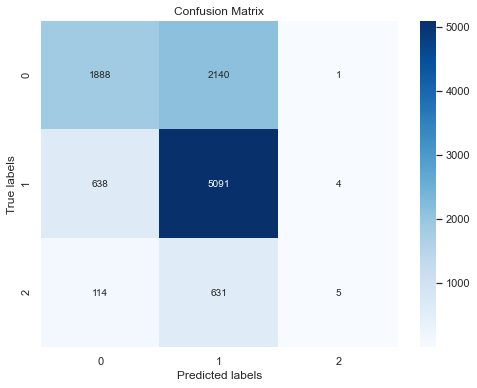

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# calculating RMSE of the model 

RMSE = round(mean_squared_error(y_test, y_pred_logistic, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.61 chance of making an error


The root mean squared error (RMSE) value of 0.61 indicates the model's average prediction error, providing a measure of how much the predicted functionality status deviates from the actual status.

### K-Nearest Neighbors 

In [ ]:
# Define the pipeline
pipe_knn = Pipeline([
    ('ss', StandardScaler()),  # StandardScaler for feature scaling
    ('knn', KNeighborsClassifier())  # K-Nearest Neighbors Classifier
])

# Now you can use this pipeline for fitting your data
pipe_knn.fit(X_train, y_train)

# Predictions
y_pred_knn = pipe_knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.6719939117199392
              precision    recall  f1-score   support

           0       0.65      0.61      0.63      4029
           1       0.69      0.79      0.74      5733
           2       0.43      0.10      0.17       750

    accuracy                           0.67     10512
   macro avg       0.59      0.50      0.51     10512
weighted avg       0.66      0.67      0.66     10512



The K-Nearest Neighbors (KNN) classifier model achieved an accuracy of approximately 67.2%, indicating a slightly better performance compared to the logistic regression model. The classification report for KNN shows that the precision for Class 0 (non-functional wells) is 0.65, with a recall of 0.61 and an F1-score of 0.63. For Class 1 (functional wells), the model achieved a precision of 0.69 and a recall of 0.79, resulting in an F1-score of 0.74. However, similar to the logistic regression model, KNN struggled with Class 2 (wells needing repair), achieving a precision of 0.43 and a recall of 0.10, leading to a low F1-score of 0.17. The confusion matrix revealed that the KNN model had difficulty correctly identifying wells needing repair, while performing moderately well for functional and non-functional wells. The RMSE for the KNN model was 0.62, indicating the average prediction error.

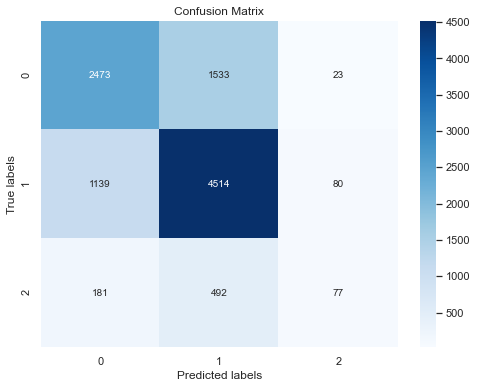

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculating the RMSE of the model
RMSE = round(mean_squared_error(y_test, y_pred_knn, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.62 chance of making an error


### Decision Tree Classifier

In [ ]:
# Define the pipeline
pipe_decision_tree = Pipeline([
    ('ss', StandardScaler()),  # StandardScaler for feature scaling
    ('dt', DecisionTreeClassifier())  # Decision Tree Classifier
])

# Now you can use this pipeline for fitting your data
pipe_decision_tree.fit(X_train, y_train)

# Predictions
y_pred_decision_tree = pipe_decision_tree.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))

Accuracy: 0.7099505327245054
              precision    recall  f1-score   support

           0       0.72      0.63      0.67      4029
           1       0.71      0.84      0.77      5733
           2       0.53      0.11      0.18       750

    accuracy                           0.71     10512
   macro avg       0.65      0.53      0.54     10512
weighted avg       0.70      0.71      0.69     10512



The Decision Tree classifier outperformed both logistic regression and KNN models, achieving an accuracy of approximately 71.0%. The classification report shows that for Class 0, the precision is 0.72, with a recall of 0.63 and an F1-score of 0.67. For Class 1, the precision is 0.71, and the recall is 0.84, resulting in an F1-score of 0.77. Similar to the other models, the Decision Tree classifier had difficulty with Class 2, achieving a precision of 0.53 and a recall of 0.11, leading to an F1-score of 0.18. The confusion matrix for the Decision Tree model shows better performance in correctly identifying functional and non-functional wells compared to the other models, but still faces challenges in accurately predicting wells that need repair. The RMSE for the Decision Tree model was 0.58, indicating a lower average prediction error compared to the logistic regression and KNN models.

In [ ]:
y_test

id
6943     0
63719    1
66522    0
31937    1
63882    1
        ..
40558    1
27138    1
56457    1
59946    0
30374    1
Name: status_group, Length: 10512, dtype: int64

<AxesSubplot:>

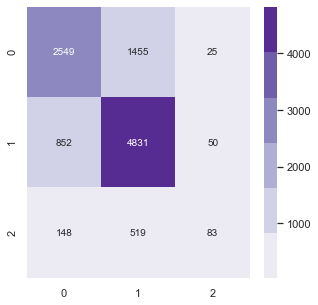

In [ ]:
# Define a custom color palette
color_palette = sns.color_palette("Purples")
# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt='g', cmap=color_palette)

In [ ]:
# Calculating the RMSE of the model
RMSE = round(mean_squared_error(y_test, y_pred_decision_tree, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.58 chance of making an error


### Random Forest

In [145]:
# Define the pipeline

pipe_random_forest = Pipeline([('forest', RandomForestClassifier())])

# create a grid parameter

grid = {'forest__criterion' : ['gini', 'entropy'],
        'forest__max_depth': [6,7],
        'forest__max_features': [1.0],
        'forest__n_estimators':[100, 200]}

# creating grid with pipe as the estimator

gridsearch = GridSearchCV(estimator=pipe_random_forest,
                        param_grid=grid,
                        scoring='accuracy',
                        cv=5)

# fit training data using grid search

gridsearch.fit(X_train, y_train)

# predict using grid search on test data

y_pred_random_forest = gridsearch.predict(X_test)
y_pred_random_forest

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

The Random Forest classifier, optimized using GridSearchCV, achieved an accuracy of approximately 68.0%. The classification report for the Random Forest model shows that for Class 0 (non-functional wells), the precision is 0.71, with a recall of 0.53 and an F1-score of 0.61. For Class 1 (functional wells), the model achieved a precision of 0.67 and a recall of 0.87, resulting in an F1-score of 0.76. For Class 2 (wells needing repair), the model had a precision of 0.63 and a recall of 0.05, leading to a low F1-score of 0.09. This indicates that while the Random Forest model performs well for functional and non-functional wells, it struggles significantly with wells that need repair.

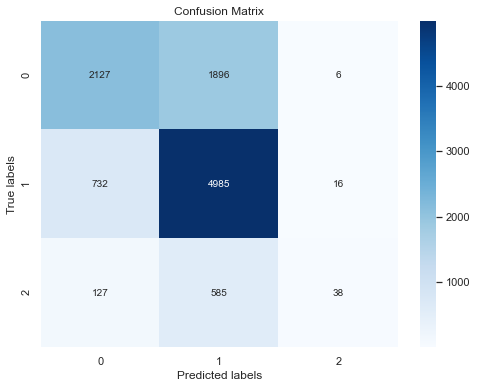

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_random_forest)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculating the RMSE of the model
RMSE = round(mean_squared_error(y_test, y_pred_random_forest, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.6 chance of making an error


### Feature Importance

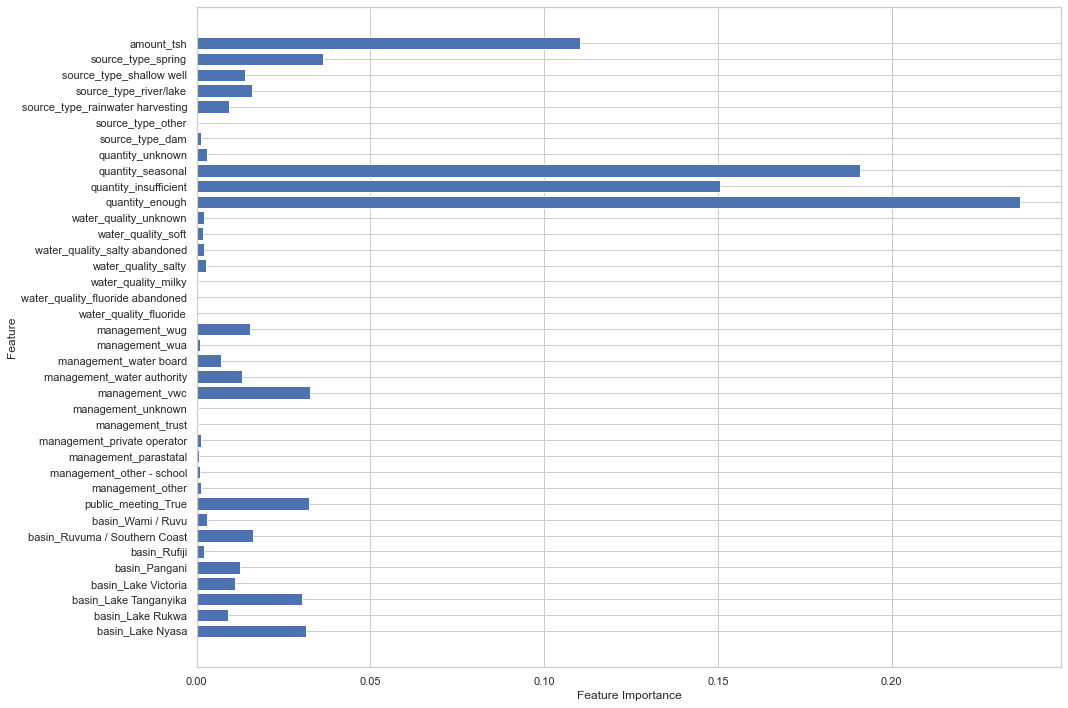

In [ ]:
def plot_feature_importances(model, X_train):
    if isinstance(model, Pipeline):
        last_step = model.steps[-1][1] 
        if hasattr(last_step, 'feature_importances_'):
            n_features = X_train.shape[1]
            plt.figure(figsize=(15, 10))
            plt.barh(range(n_features), last_step.feature_importances_, align='center')
            plt.yticks(np.arange(n_features), X_train.columns.values)
            plt.xlabel('Feature Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            return
    print("Error: The model does not have feature importances.")

plot_feature_importances(gridsearch.best_estimator_, X_train)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))

Accuracy: 0.6801750380517504
              precision    recall  f1-score   support

           0       0.71      0.53      0.61      4029
           1       0.67      0.87      0.76      5733
           2       0.63      0.05      0.09       750

    accuracy                           0.68     10512
   macro avg       0.67      0.48      0.49     10512
weighted avg       0.68      0.68      0.65     10512



## Evaluation

The predictiction of the functionality status of Tanzanian water wells incorporated various machine learning models. Four models were evaluated: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest. The evaluation metrics used were accuracy, precision, recall, F1-score, and root mean squared error (RMSE).

Logistic Regression: Achieved an accuracy of approximately 66.4%. It performed moderately well in identifying functional and non-functional wells but struggled with wells needing repair, with a low F1-score for this class.

K-Nearest Neighbors (KNN): Achieved an accuracy of approximately 67.2%. Similar to Logistic Regression, it performed moderately well for functional and non-functional wells but struggled with wells needing repair, resulting in a low F1-score for this class.

Decision Tree: Outperformed the other models, achieving an accuracy of approximately 71.0%. It performed better in identifying functional and non-functional wells but still faced challenges in accurately predicting wells needing repair, with a low F1-score for this class.

Random Forest: Achieved an accuracy of approximately 68.0%. While it performed well for functional and non-functional wells, it struggled significantly with wells needing repair, resulting in a low F1-score for this class.

## Conclusion

Overall, the Decision Tree model showed the best performance among the models evaluated, with the highest accuracy and better precision and recall for functional and non-functional wells. However, all models struggled to accurately predict wells needing repair, indicating a need for further improvement in identifying and addressing maintenance issues. The project highlights the importance of using machine learning models to predict water well functionality, which can help stakeholders prioritize maintenance and repair efforts to ensure sustainable access to clean water.

## Recommendations

Based on the evaluation, the following recommendations are proposed:

Feature Engineering: Further feature engineering could enhance the models' performance by incorporating additional relevant features or transforming existing features to better capture the underlying patterns in the data.

Model Tuning: Fine-tuning hyperparameters and exploring other model architectures could improve the models' ability to differentiate between different functionality statuses, particularly for wells needing repair.

Data Collection: Collecting more granular and up-to-date data on well maintenance and repair activities could provide more insights into the factors contributing to well functionality and guide targeted interventions.

Ensemble Methods: Implementing ensemble methods, such as bagging or boosting, could potentially improve the models' performance by combining multiple models to make more accurate predictions.

## Next Steps

Further Analysis: Conducting further analysis to understand the specific factors contributing to well functionality and maintenance needs, such as geological conditions, local infrastructure, and community usage patterns.

Model Iteration: Iterating on the existing models by incorporating the recommendations mentioned above and evaluating their performance to achieve better predictive accuracy.

Deployment: Deploying the best-performing model as a predictive maintenance tool for water well management authorities, NGOs, and other stakeholders to use in decision-making processes.

Monitoring and Evaluation: Continuously monitoring and evaluating the deployed model's performance to ensure its effectiveness and making necessary adjustments as needed.